<a href="https://www.kaggle.com/kamaljp/silver-micro-future-ts-eda-n-arima-modelling?scriptVersionId=86687058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Timeseries Analysis of Silver Microfutures

* Understand the timeseries data

* Post process the data for analysis

* Basic plotting and Exploratory Data Analysis

* ACF/ PACF analysis

* Fitting using ARIMA model

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
from matplotlib import rcParams
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["legend.fontsize"] = "small"
pd.set_option("precision", 2)
warnings.filterwarnings("ignore")

In [3]:
Jun = pd.read_csv('../input/silverminidataset/30Jun2021.csv',parse_dates=["Date"],index_col="Date")
Jun = Jun [['Open','High','Low','Close','Previous Close']]

In [4]:
Aug= pd.read_csv('../input/silverminidataset/31AUG2021.csv',parse_dates=["Date"],index_col="Date")
Aug = Aug [['Open','High','Low','Close','Previous Close']]

In [5]:
print(Jun.head())
print(Jun.tail())

               Open     High      Low    Close  Previous Close
Date                                                          
2021-06-30  67442.0  68389.0  67307.0  67910.0         67405.0
2021-06-29  68357.0  68425.0  67005.0  67405.0         68325.0
2021-06-28  68275.0  68637.0  67960.0  68325.0         68044.0
2021-06-25  67936.0  68525.0  67760.0  68044.0         67658.0
2021-06-24  67925.0  68200.0  66201.0  67658.0         68096.0
            Open  High  Low    Close  Previous Close
Date                                                
2020-10-08   NaN   NaN  NaN  64906.0         64823.0
2020-10-07   NaN   NaN  NaN  64823.0         65025.0
2020-10-06   NaN   NaN  NaN  65025.0         66429.0
2020-10-05   NaN   NaN  NaN  66429.0         65612.0
2020-10-01   NaN   NaN  NaN  65612.0         63255.0


In [6]:
print(Aug.head())
print(Aug.tail())

               Open     High      Low    Close  Previous Close
Date                                                          
2021-08-06  67102.0  67200.0  65010.0  65304.0         67248.0
2021-08-05  67698.0  67931.0  66950.0  67248.0         67803.0
2021-08-04  68180.0  68994.0  67556.0  67803.0         68115.0
2021-08-03  67985.0  68230.0  67531.0  68115.0         68088.0
2021-08-02  68200.0  68348.0  67750.0  68088.0         68058.0
               Open     High      Low    Close  Previous Close
Date                                                          
2020-12-07      NaN      NaN      NaN  67693.0         65656.0
2020-12-04  66312.0  66312.0  64999.0  65656.0         63768.0
2020-12-03  62806.0  66600.0  62806.0  63768.0         65304.0
2020-12-02      NaN      NaN      NaN  65304.0         65142.0
2020-12-01      NaN      NaN      NaN  65142.0         63053.0


In [7]:
Jun = Jun[~Jun.Open.isnull()]
Jun.tail()

,Open,High,Low,Close,Previous Close
Date,,,,,
2020-11-25,64064.0,64100.0,64064.0,64082.0,64064.0
2020-11-24,64417.0,64487.0,63560.0,64064.0,67101.0
2020-11-23,69196.0,69196.0,64710.0,67101.0,66688.0
2020-11-19,65190.0,65190.0,65185.0,65188.0,67060.0
2020-11-09,66601.0,66601.0,66601.0,66601.0,69376.0


In [8]:
Aug[~Aug.Open.isnull()]

,Open,High,Low,Close,Previous Close
Date,,,,,
2021-08-06,67102.0,67200.0,65010.0,65304.0,67248.0
2021-08-05,67698.0,67931.0,66950.0,67248.0,67803.0
2021-08-04,68180.0,68994.0,67556.0,67803.0,68115.0
2021-08-03,67985.0,68230.0,67531.0,68115.0,68088.0
2021-08-02,68200.0,68348.0,67750.0,68088.0,68058.0
...,...,...,...,...,...
2020-12-22,68724.0,68724.0,68724.0,68724.0,71513.0
2020-12-21,72570.0,72570.0,70455.0,71513.0,69779.0
2020-12-18,69779.0,69779.0,69779.0,69779.0,70621.0


In [9]:
#I just need the data from 30th June till date
#The slicing starts reverse, because my dates are reversed
Aug = Aug.loc["2021-08":"2021-07"]

In [10]:
#Creating Data from Nov'20 to Jul'21, that is 9 months
qtr = Aug.append(Jun)

In [11]:
print(qtr.shape)
qtr.head()

(184, 5)


,Open,High,Low,Close,Previous Close
Date,,,,,
2021-08-06,67102.0,67200.0,65010.0,65304.0,67248.0
2021-08-05,67698.0,67931.0,66950.0,67248.0,67803.0
2021-08-04,68180.0,68994.0,67556.0,67803.0,68115.0
2021-08-03,67985.0,68230.0,67531.0,68115.0,68088.0
2021-08-02,68200.0,68348.0,67750.0,68088.0,68058.0


In [12]:
qtr['mon'] = qtr.index.month_name()

In [13]:
qtr['day'] = qtr.index.day_name()

In [14]:
#qtr['Open'].asfreq('M').tail(5) is not workin
qtr.tail()

,Open,High,Low,Close,Previous Close,mon,day
Date,,,,,,,
2020-11-25,64064.0,64100.0,64064.0,64082.0,64064.0,November,Wednesday
2020-11-24,64417.0,64487.0,63560.0,64064.0,67101.0,November,Tuesday
2020-11-23,69196.0,69196.0,64710.0,67101.0,66688.0,November,Monday
2020-11-19,65190.0,65190.0,65185.0,65188.0,67060.0,November,Thursday
2020-11-09,66601.0,66601.0,66601.0,66601.0,69376.0,November,Monday


In [15]:
#Learning to impute
imputer = pd.read_csv('../input/silverminidataset/30Jun2021.csv',parse_dates=["Date"],index_col="Date")

In [16]:
imputer = imputer[['Open','High','Low','Close','Previous Close']]

In [17]:
imputer[imputer.Open.isna()].Open = imputer[imputer.Open.isna()].Close

In [18]:
for id in imputer[imputer.Open.isna()].index:
    imputer.loc[id,'Open'] = imputer.loc[id,'Close']

In [19]:
for id in imputer[imputer.High.isna()].index:
    imputer.loc[id,'High'] = imputer.loc[id,'Close']

In [20]:
for id in imputer[imputer.Low.isna()].index:
    imputer.loc[id,'Low'] = imputer.loc[id,'Close']

In [21]:
imputer.tail()

,Open,High,Low,Close,Previous Close
Date,,,,,
2020-10-08,64906.0,64906.0,64906.0,64906.0,64823.0
2020-10-07,64823.0,64823.0,64823.0,64823.0,65025.0
2020-10-06,65025.0,65025.0,65025.0,65025.0,66429.0
2020-10-05,66429.0,66429.0,66429.0,66429.0,65612.0
2020-10-01,65612.0,65612.0,65612.0,65612.0,63255.0


In [22]:
#Creating Data from Nov'20 to Jul'21, that is 9 months
new_qtr = Aug.append(imputer)

In [23]:
print(qtr.shape)
print(new_qtr.shape)
#If not imputed, then approx 60 days closing price will be lost

(184, 7)
(219, 5)


In [24]:
new_qtr['day']=new_qtr.index.day_name()
new_qtr['month']=new_qtr.index.month_name()
new_qtr.head()

,Open,High,Low,Close,Previous Close,day,month
Date,,,,,,,
2021-08-06,67102.0,67200.0,65010.0,65304.0,67248.0,Friday,August
2021-08-05,67698.0,67931.0,66950.0,67248.0,67803.0,Thursday,August
2021-08-04,68180.0,68994.0,67556.0,67803.0,68115.0,Wednesday,August
2021-08-03,67985.0,68230.0,67531.0,68115.0,68088.0,Tuesday,August
2021-08-02,68200.0,68348.0,67750.0,68088.0,68058.0,Monday,August


In [25]:
#Adding additional information
new_qtr['intra'] = new_qtr.Open - new_qtr.Close
new_qtr['gap'] = new_qtr.Open - new_qtr['Previous Close']
new_qtr.tail()

,Open,High,Low,Close,Previous Close,day,month,intra,gap
Date,,,,,,,,,
2020-10-08,64906.0,64906.0,64906.0,64906.0,64823.0,Thursday,October,0.0,83.0
2020-10-07,64823.0,64823.0,64823.0,64823.0,65025.0,Wednesday,October,0.0,-202.0
2020-10-06,65025.0,65025.0,65025.0,65025.0,66429.0,Tuesday,October,0.0,-1404.0
2020-10-05,66429.0,66429.0,66429.0,66429.0,65612.0,Monday,October,0.0,817.0
2020-10-01,65612.0,65612.0,65612.0,65612.0,63255.0,Thursday,October,0.0,2357.0


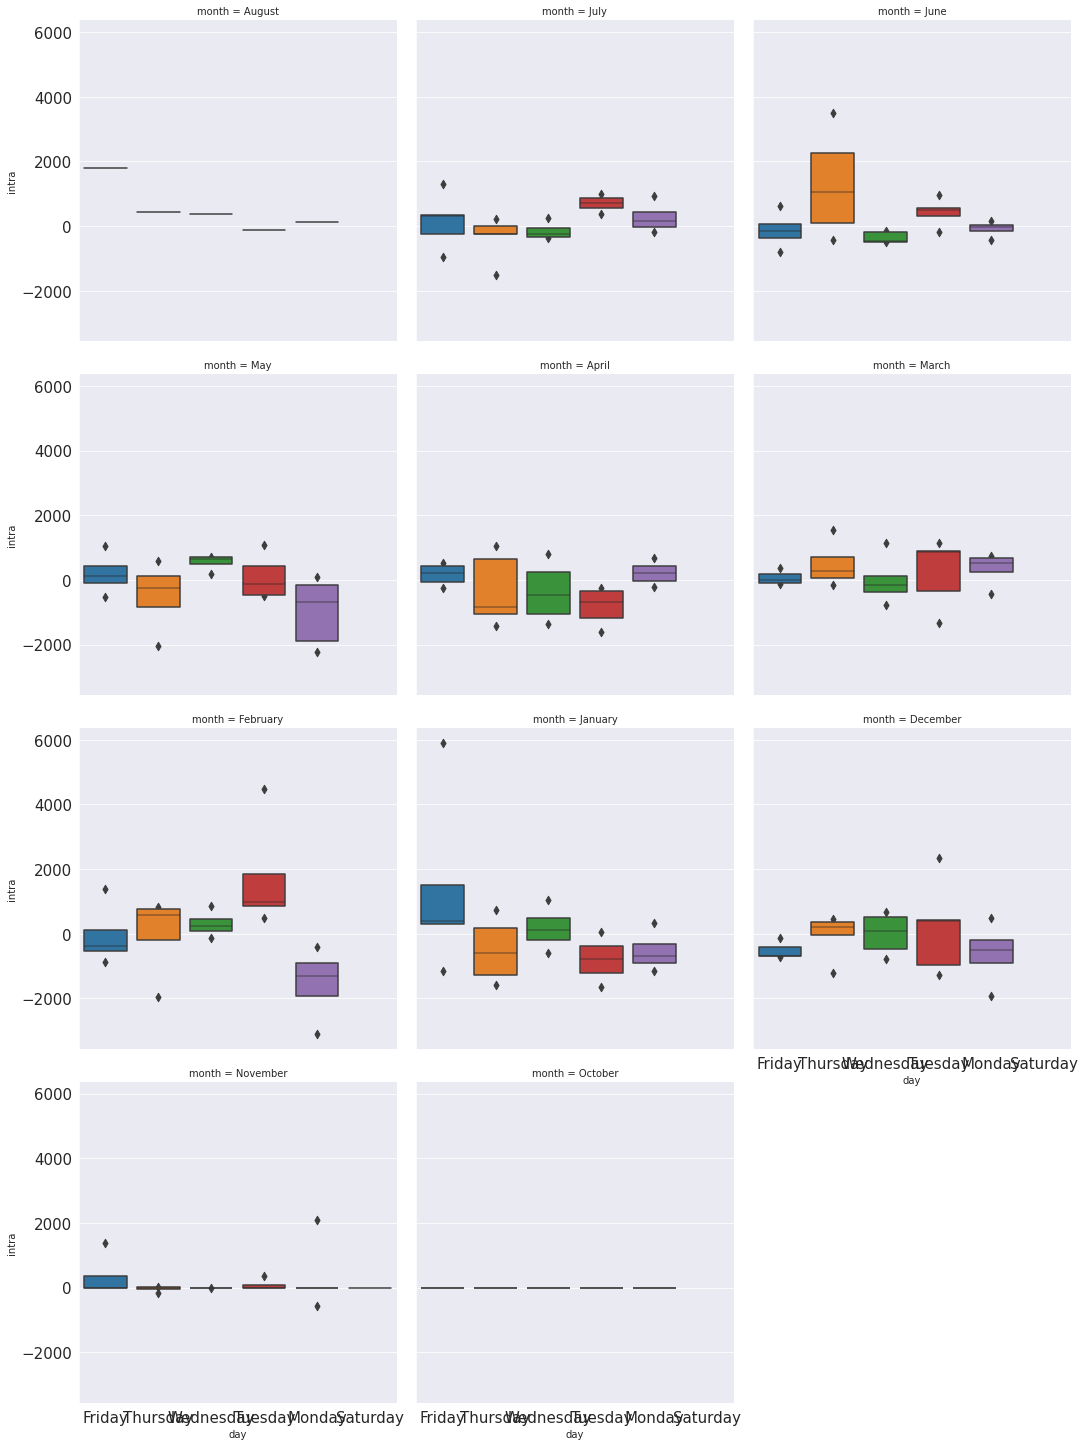

In [26]:
#Which days of the week there has been high intra day jump?

sns.catplot(y ='intra', x = 'day',data=new_qtr, kind='boxen',col='month',col_wrap=3)

The above plots show many insights
1) In the beginning there is not much Intraday action, since Open and Close are the same, even though, the close might be at different values

2)Most of the intraday action happens on the Friday, as the week closes.

3)Major moves or corrections happen on the Thursdays, and on Tuesdays in most of the months. Mondays and Fridays are active only in 2 or less months.

4)Intraday has seen some good positive moves, upto 6000 INR. When it comes to negative side, it has gone upto -2500 INR in a day


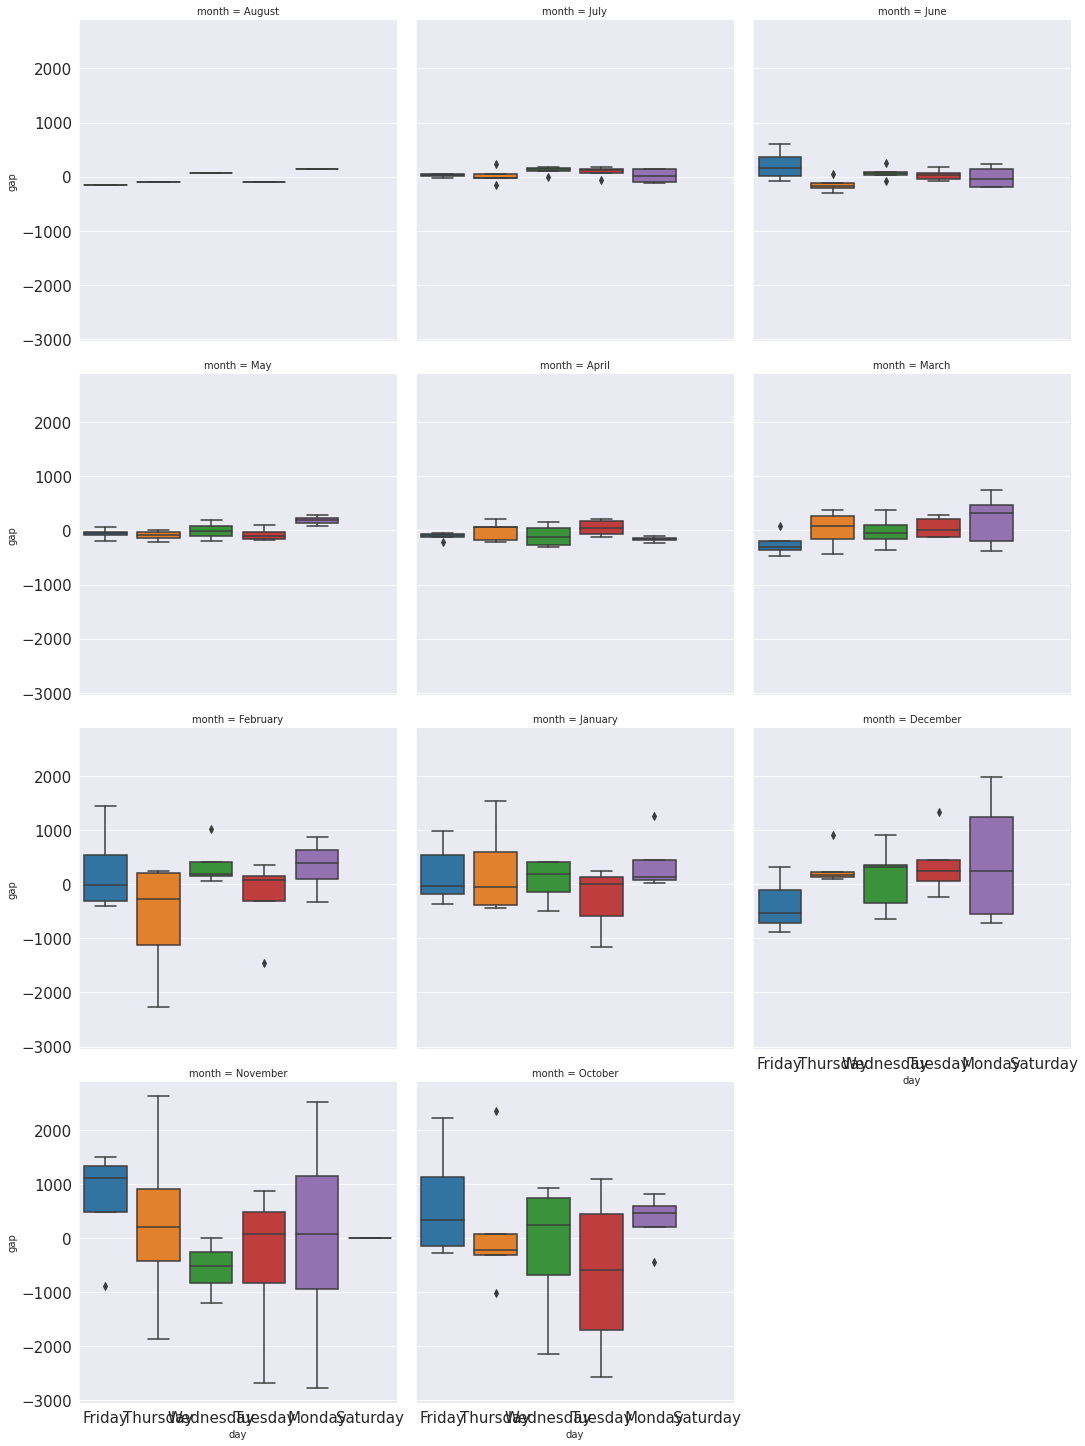

In [27]:
#Which days of the week there has been high intra day jump?
sns.catplot(y ='gap', x = 'day',data=new_qtr, kind='box',col='month',col_wrap=3)

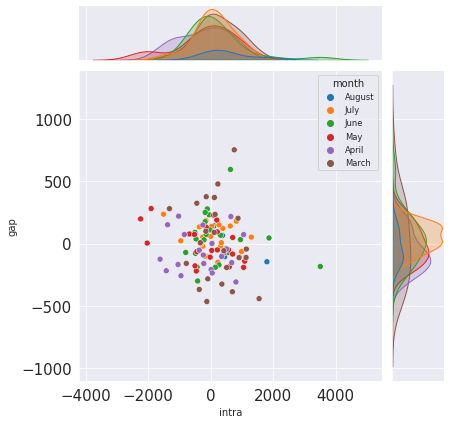

In [28]:
sns.jointplot(x='intra',y='gap',data=new_qtr[:'2021-03'],hue='month')

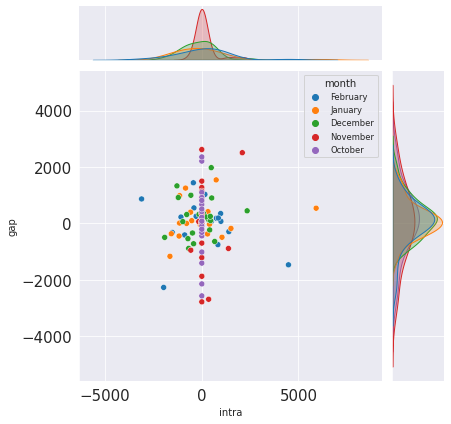

In [29]:
sns.jointplot(x='intra',y='gap',data=new_qtr['2021-02':],hue='month')

In [30]:
vol = pd.read_csv('../input/silverminidataset/30Jun2021.csv',parse_dates=["Date"],index_col="Date")
vol = vol[['Volume(Lots)','Close']]

In [31]:
vol['day'] = vol.index.day_name()
vol['month'] = vol.index.month_name()

In [32]:
vol.head()

,Volume(Lots),Close,day,month
Date,,,,
2021-06-30,189,67910.0,Wednesday,June
2021-06-29,559,67405.0,Tuesday,June
2021-06-28,981,68325.0,Monday,June
2021-06-25,3588,68044.0,Friday,June
2021-06-24,22480,67658.0,Thursday,June


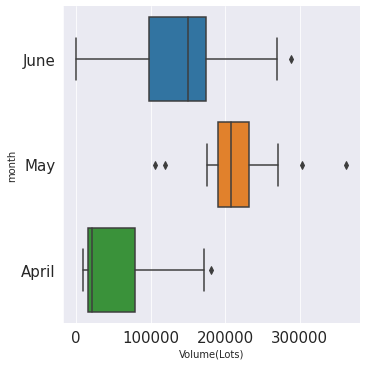

In [33]:
sns.catplot(x='Volume(Lots)',y='month',data=vol[:'2021-04'],kind='box')

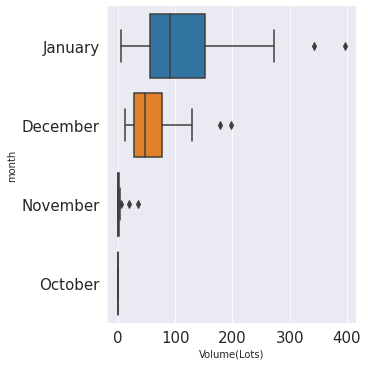

In [34]:
sns.catplot(x='Volume(Lots)',y='month',data=vol['2021-01':],kind='box')

1) One can see from the Opening Gap, how liquid the market is for traders

2) Overnight impact on the pricing slowly fades away as the future starts getting traded by more people

* By looking at the volumes traded till date, and dividing it into each month the details can be seen visually

* More people entering the market there is significant liquidity to abosorb any price shocks

3) How significant the impact of opening gap  on the intraday movement? 

* Take a look at one of the joint plot between the opening gap and the intraday moves, there is no correlation

* Higher Opening Gaps have occured during the initial months when the liquidity was less

* After splitting the data with help of the months column, the significance of the liquidity can be observed

Questions:
1) Where the price of the instrument comes in the begining of the instrument?
    
    - Usually, it is calculated and registered by the script creator on the market
    
    - The market makers open the script and close at the same price for accounting purposes
    
    - Even in this data in the beginning you will see the "Close" prices copied onto the "Open","High","Low", for the days 
    where this information was missing. Imputing in the statistical way was not done. 
    
2) How can these insights be used for understanding the price movements?

    - Price moves because there is supply and demand change of the underlying, in this it was silver. The instrument, Silver   Micro future
    
    - Once the analysis is through, and you find that using the price movement of this instrument is useless, then you search for another instrument that is correlating with this instrument. We have one such underlying, it is Gold.
    
    - Using the probability of the price movements can be very useful in controlling your anxiety during the wild swings in the market. The below plots on the "Close" will show what happens in market in statistical point.

<AxesSubplot:xlabel='Date'>

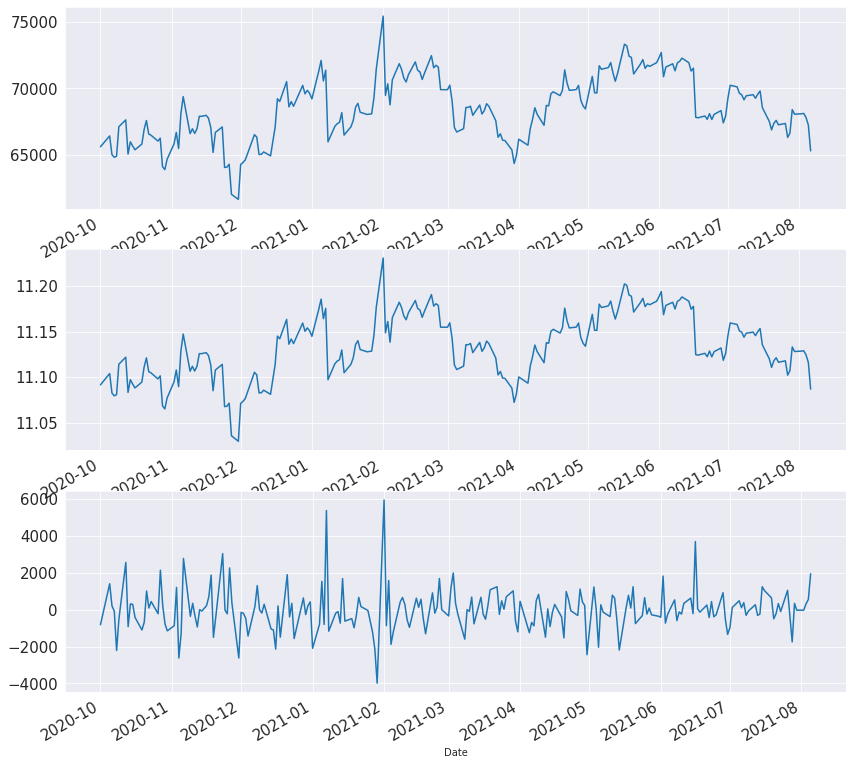

In [35]:
new_qtr['lognat'] = new_qtr['Close'].apply(lambda x: np.log(x))

fig, ax = plt.subplots(3,1,figsize=(14,14))

new_qtr.Close.plot(ax=ax[0])

new_qtr.lognat.plot(ax=ax[1])

new_qtr['lag'] = new_qtr.Close - new_qtr.Close.shift()
new_qtr.lag.plot(ax=ax[2])

#To begin with 

Let us directly try to find out whether there is any correlation between the lagged prices. This is called as autocorrelation.
There are partial ACF and ACF functions that can help find out such a correlations in the series.

If there is no correlation, then the series is effectively a Random Walk. Lets begin

In [36]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

#Here we are subtracting the close of earlier date with later date
lag_correlations = acf(new_qtr['lag'].iloc[1:])
lag_partial_correlations = pacf(new_qtr['lag'].iloc[1:])

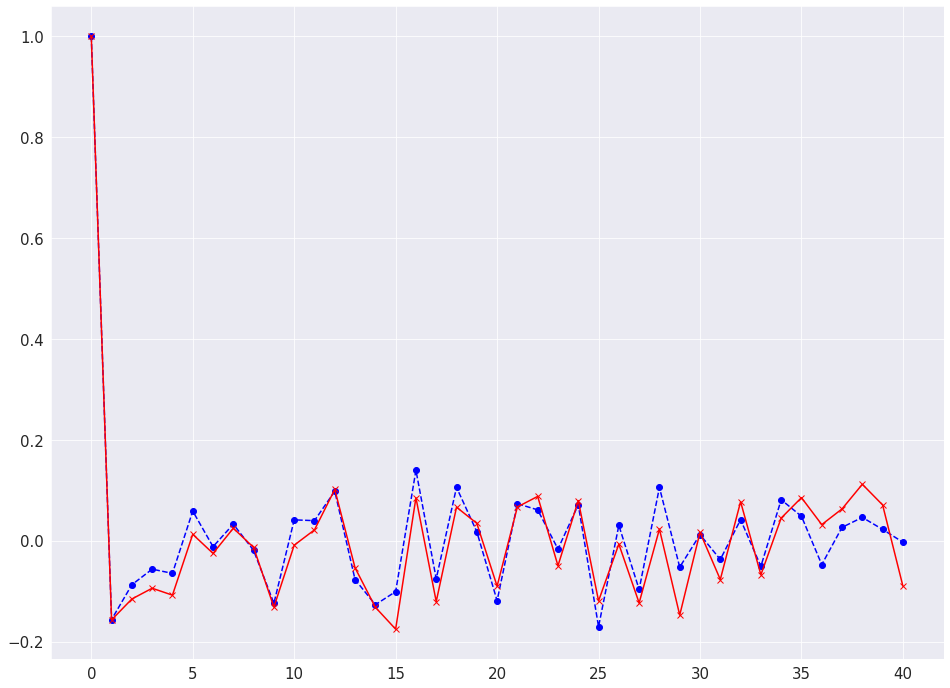

In [37]:
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(lag_correlations, marker='o', linestyle='--',color='b')
ax.plot(lag_partial_correlations, marker='x', linestyle='-',color='r')

The graph above shows that there is no significant correlation between the "lagged" series and the next 40 such lags. So essentially the series is a Random Walk. 

<Figure size 1440x720 with 0 Axes>

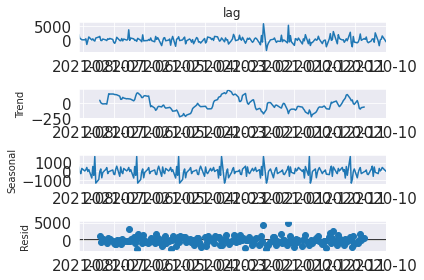

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_qtr['lag'].iloc[1:], model='additive', freq=30)
fig = plt.figure(figsize=(20,10))
fig = decomposition.plot()

<Figure size 432x288 with 0 Axes>

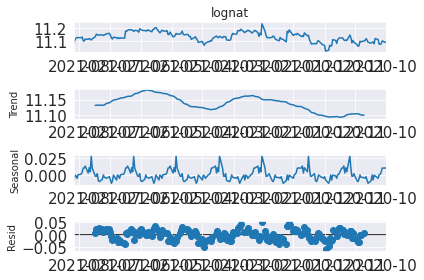

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_qtr['lognat'], model='additive', freq=30)
fig = plt.figure()
fig = decomposition.plot()

There is surprising monthly cycles on the closing prices. What can explain this seasonality?

How can this seasonality be leveraged for forecasting? b

<AxesSubplot:xlabel='Date'>

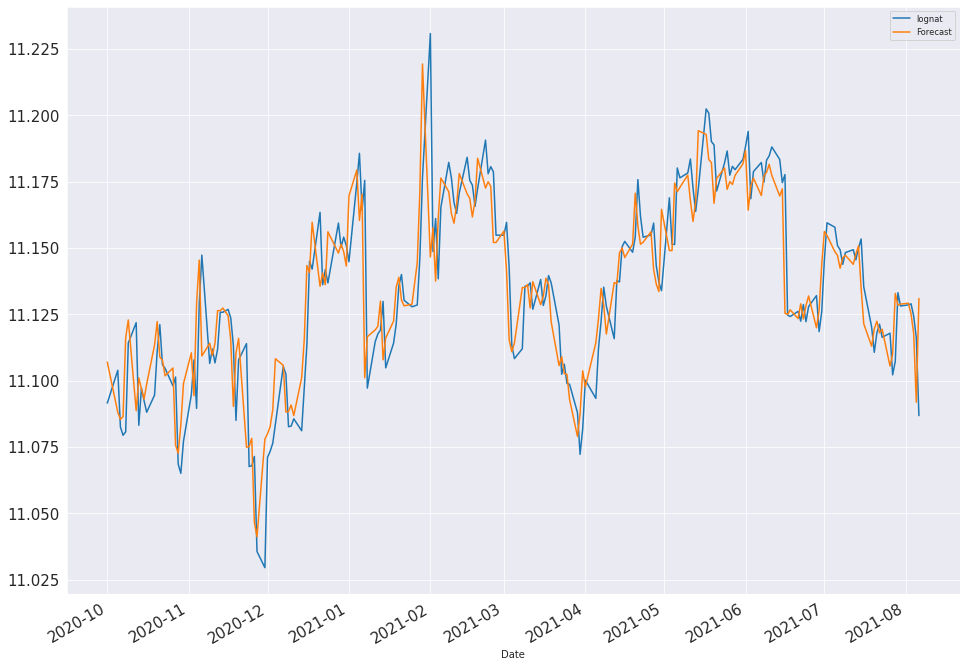

In [40]:
model = sm.tsa.ARIMA(new_qtr.lognat, order=(1, 0, 0))
results = model.fit(disp=-1)
new_qtr['Forecast'] = results.fittedvalues
new_qtr[['lognat', 'Forecast']].plot(figsize=(16, 12))

It has performed much better with the natural log values, how it will do on natural log with a lag?

In [41]:
new_qtr['diff_lognat'] = new_qtr.lognat - new_qtr.lognat.shift()

<AxesSubplot:xlabel='Date'>

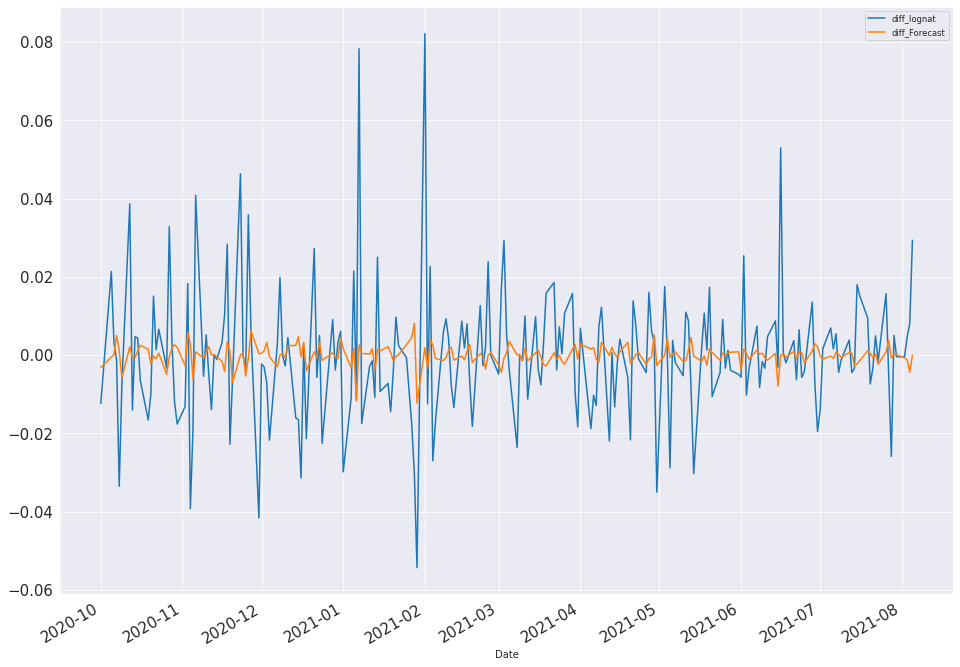

In [42]:
model = sm.tsa.ARIMA(new_qtr.diff_lognat.iloc[1:], order=(1, 0, 0))
results = model.fit(disp=-1)
new_qtr['diff_Forecast'] = results.fittedvalues
new_qtr[['diff_lognat', 'diff_Forecast']].plot(figsize=(16, 12))

Now it's pretty obvious that the forecast is way off.  We're predicting tiny little variations relative to what is actually happening day-to-day.  Again, this is more of less expected with a simple moving average model of a random walk time series.  There's not enough information from the previous days to accurately forcast what's going to happen the next day.

A moving average model doesn't appear to do so well.  What about an exponential smoothing model?  Exponential smoothing spreads out the impact of previous values using an exponential weighting, so things that happened more recently are more impactful than things that happened a long time ago.  Maybe this "smarter" form of averaging will be more accurate?

<AxesSubplot:xlabel='Date'>

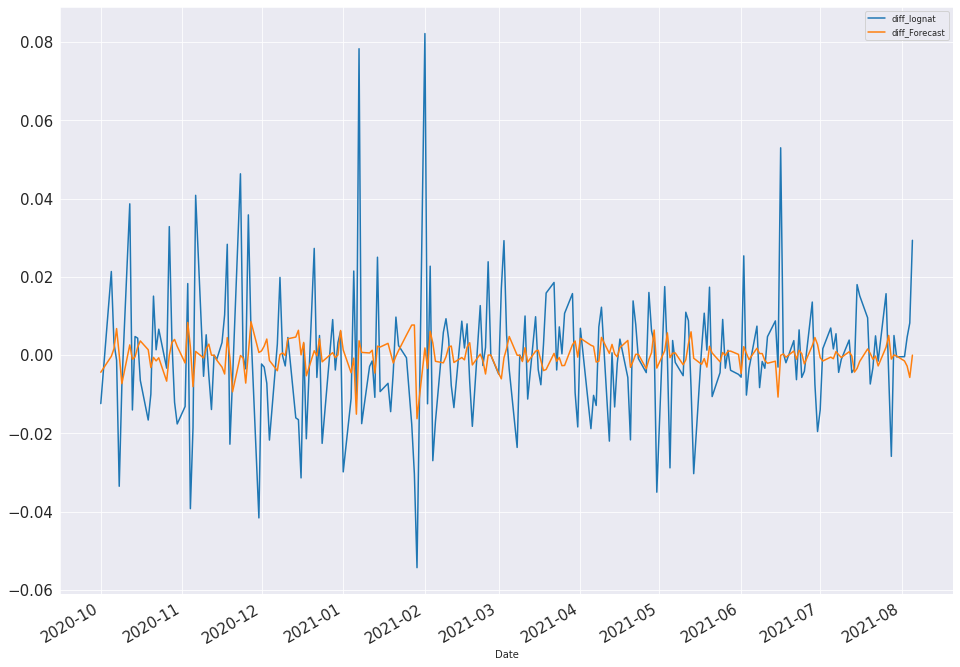

In [43]:
model = sm.tsa.ARIMA(new_qtr.diff_lognat.iloc[1:], order=(0, 0, 1))
results = model.fit(disp=-1)
new_qtr['diff_Forecast'] = results.fittedvalues
new_qtr[['diff_lognat', 'diff_Forecast']].plot(figsize=(16, 12))

Objective of this notebook is not just to check how the prediction is being done on a time series, but to understand the series and then use the knowledge to predict in other more predictable series.

## Thanks for Joining me in this journey....